In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [2]:
def reshape(pixels):
    sqrt = int(np.sqrt(pixels.shape[0]))
    return pixels.copy().reshape(sqrt,sqrt)

def visualize(data, index):
    pixels = data.data[index]
    label = data.target[index]
    pixels = reshape(pixels)
    plt.title(label)
    plt.imshow(pixels, cmap='gray_r')
    
def visualize(data, st_idx, end_idx):
    n_images = end_idx - st_idx
    for i in range(st_idx, end_idx):
        subplot_idx = i - st_idx + 1
        ax = plt.subplot(n_images,1,subplot_idx)
        pixels = data.data[i]
        label = data.target[i]
        pixels = reshape(pixels)
        ax.imshow(pixels, cmap='gray_r')
    plt.title(label)
    plt.show()

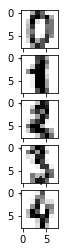

In [3]:
visualize(digits, 0, 5)

In [4]:
np.random.seed(1)#for consistent results
shuffled_index = np.random.permutation(range(X.shape[0]))
shuffled_X = X[shuffled_index]
shuffled_y = y[shuffled_index]
train_test_split = int(X.shape[0] * 0.85)

train_X = shuffled_X[:train_test_split]
train_y = shuffled_y[:train_test_split]
test_X = shuffled_X[train_test_split:]
test_y = shuffled_y[train_test_split:]

In [5]:
def model(clf):
    global train_X, train_y, test_X, test_y
    clf = clf.fit(train_X, train_y)
    train_preds = clf.predict(train_X)
    test_preds = clf.predict(test_X)
    acc = {}
    acc['train'] = accuracy_score(train_y, train_preds)
    acc['test'] = accuracy_score(test_y, test_preds)
    return acc

def print_acc(model_name, acc):
    print ("""
{}
Train: {:.2%}\tTest: {:.2%}""".format(model_name,acc['train'],acc['test']))

In [6]:
log_acc = model(LogisticRegression())
print_acc("Logistic Regression",log_acc)


Logistic Regression
Train: 99.74%	Test: 94.44%


Logistic regression alone works pretty well here, with accuracies ~94.4%!  There is some overfitting, let's see if we can improve with increasing weight of L2 regularization

In [7]:
log_acc = model(LogisticRegression(C=0.01))
print_acc("Logistic Regression",log_acc)


Logistic Regression
Train: 98.30%	Test: 97.04%


Through regularization we were able to improve results to 97%

In [8]:
nn_log = model(MLPClassifier(hidden_layer_sizes=(), max_iter=1000,random_state=1))
print_acc('Single unit nn (logistic regression)',nn_log)


Single unit nn (logistic regression)
Train: 99.87%	Test: 94.81%


As expected, single output neuron network has performance similar to logistic regression as that's all it's doing!

In [9]:
neurons = [1,8,16,32,64,128,256,512,1024]
accuracies = []
aucs = []
print("MLP with single hidden layer")
for each in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(each), max_iter=1000,activation='relu', random_state=1)
    acc = model(nn)
    print_acc('{} hidden units'.format(each), acc)

MLP with single hidden layer

1 hidden units
Train: 28.81%	Test: 24.07%

8 hidden units
Train: 98.10%	Test: 91.48%

16 hidden units
Train: 100.00%	Test: 96.30%

32 hidden units
Train: 100.00%	Test: 96.30%

64 hidden units
Train: 100.00%	Test: 97.78%

128 hidden units
Train: 100.00%	Test: 96.67%

256 hidden units
Train: 100.00%	Test: 97.04%

512 hidden units
Train: 100.00%	Test: 97.41%

1024 hidden units
Train: 100.00%	Test: 97.04%


Test set accuracy increases with number of hidden units until 64 then we begin to suffer increased error likely 2/2 overfitting.  Interestingly, making hidden layer size smaller than output size actually decreases accuracy, which makes sense as you're boing down all features into 1 neuron and then trying to expand from there.  If you want to learn hierarchical representation of features, likely need to start with larger number of hidden units and then boil down to output size

In [10]:
neurons = [1,8,16,32,64,128,256,512,1024]
accuracies = []
aucs = []
print("MLP with two hidden layers")
for each in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(each,each), max_iter=1000,activation='relu', random_state=1)
    acc = model(nn)
    print_acc('{} hidden units'.format(each), acc)


MLP with two hidden layers

1 hidden units
Train: 28.09%	Test: 25.93%

8 hidden units
Train: 98.49%	Test: 91.85%

16 hidden units
Train: 100.00%	Test: 95.19%

32 hidden units
Train: 100.00%	Test: 97.04%

64 hidden units
Train: 100.00%	Test: 97.41%

128 hidden units
Train: 100.00%	Test: 97.78%

256 hidden units
Train: 100.00%	Test: 98.15%

512 hidden units
Train: 100.00%	Test: 98.52%

1024 hidden units
Train: 100.00%	Test: 98.15%


In [11]:
neurons = [1,8,16,32,64,128,256,512,1024]
accuracies = []
aucs = []
print("MLP with three hidden layers")
for each in neurons:
    nn = MLPClassifier(hidden_layer_sizes=(each,each,each), max_iter=1000,activation='relu', random_state=1)
    acc = model(nn)
    print_acc('{} hidden units'.format(each), acc)


MLP with three hidden layers

1 hidden units
Train: 22.99%	Test: 19.26%

8 hidden units
Train: 98.23%	Test: 90.74%

16 hidden units
Train: 99.93%	Test: 93.33%

32 hidden units
Train: 100.00%	Test: 95.93%

64 hidden units
Train: 100.00%	Test: 97.41%

128 hidden units
Train: 100.00%	Test: 96.67%

256 hidden units
Train: 100.00%	Test: 98.15%

512 hidden units
Train: 100.00%	Test: 98.52%

1024 hidden units
Train: 100.00%	Test: 98.52%


Increasing number of layers improves accuracy with large numbers of hidden units.  In those with smaller number of hidden units, accuracy doesn't improve or begins to overfit.

Best models = 2 or 3 layers with 512 units or 3 layers with 1024 units 

In [14]:
tree_acc = model(DecisionTreeClassifier(random_state=1))
print_acc("Decision Tree (unregularized)", tree_acc)


Decision Tree (unregularized)
Train: 100.00%	Test: 87.78%


As expected, single decision tree overfit the training data, let's try a random forest

In [15]:
rf_acc =model(RandomForestClassifier(n_estimators=100, random_state=1))
print_acc('Random Forest', rf_acc)


Random Forest
Train: 100.00%	Test: 97.41%


Accuracy of random forest classifier with 100 trees a bit better than regularized logistic regression

### Overall accuracy
* 98.5%: NN with 2 layers and 512 hidden units each
* 97.4%: Random forest
* 97.0%: regularized logistic regression
* 94.8%: unregularized logistic regression
* 87.8%: unregularized decision tree